# Group Project
## Sports Analytics
---


**Load List of Active GMs**

In [1]:
import pandas as pd
gm = pd.read_csv('~/Documents/Fordham/Sports Analytics/Project/activeGMsV2.txt',sep='\t')

In [2]:
gm.head()

,Team,General Manager,Date of hire,Active,URL
0,Atlanta Hawks,Travis Schlenk,2017,Y,http://www.prosportstransactions.com/basketbal...
1,Boston Celtics,Danny Ainge,2003,Y,http://www.prosportstransactions.com/basketbal...
2,Brooklyn Nets,Sean Marks,2016,Y,http://www.prosportstransactions.com/basketbal...
3,Charlotte Hornets,Rich Cho,2011,Y,http://www.prosportstransactions.com/basketbal...
4,Chicago Bulls,Gar Forman,2009,Y,http://www.prosportstransactions.com/basketbal...


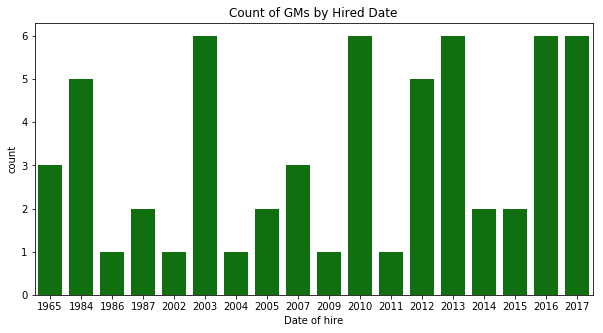

In [3]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
gmCnt = sns.countplot(x="Date of hire", data=gm,color='green')
gmCnt.set_title("Count of GMs by Hired Date")

---
## Scrape Transactions

Transactions for each active GM were scraped in order to determine the transactions for which the GM / executive was responsible for.
* *Note*: the role of the general manager can be very different for each franchise and sometimes the personnel decisions are not solely made by the GM
* Data was sourced from http://www.prosportstransactions.com
* Only contains GMs active as of *March 4th 2018*

In [4]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import urllib.request
import re
import requests
import pprint
class AppURLopener(urllib.request.FancyURLopener):
    version = "Mozilla/5.0"

In [5]:
def gmScrape(gmName,URL):
        query = (URL)
        opener = AppURLopener()
        response = opener.open(query)
        soup = BeautifulSoup(response,'html.parser')
        urlList = []
        for tr in soup.find_all('tr')[-1:]:
            tds = tr.find_all('a')
            for x in tds[:-1]:
                urlList.append(str(URL[:-1])+str(int(x.text)*25))
        info = soup.find('table',{'class':'datatable center'})
        date = []
        team = []
        acquired = []
        relinquished = []
        notes = []
        for tr in soup.find_all('tr')[2:-1]:
            tds = tr.find_all('td')
            date.append(tds[0].text)
            team.append(tds[1].text)
            acquired.append(tds[2].text)
            relinquished.append(tds[3].text)
            notes.append(tds[4].text)
        for y in urlList:
            query = (str(y))
            opener = AppURLopener()
            response = opener.open(query)
            soup = BeautifulSoup(response,'html.parser')
            for tr in soup.find_all('tr')[1:-1]:
                tds = tr.find_all('td')
                date.append(tds[0].text)
                team.append(tds[1].text)
                acquired.append(tds[2].text)
                relinquished.append(tds[3].text)
                notes.append(tds[4].text)
        df1 = pd.DataFrame({'date':date,
                     'team': team,
                     'acquired':acquired,
                     'relinquished':relinquished,
                     'notes':notes})
        df1['GM'] = gmName
        return(df1)

In [6]:
finalDat = pd.DataFrame()
for genM,urlEach in zip(gm['General Manager'],gm['URL']):
    if str(urlEach).lower()=="nan":
        pass
    else:
        dat = gmScrape(str(genM),str(urlEach))
        finalDat = pd.concat([finalDat,dat])
        finalDat.reset_index()

c:\users\ryan\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: AppURLopener style of invoking requests is deprecated. Use newer urlopen functions/methods
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\ryan\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: AppURLopener style of invoking requests is deprecated. Use newer urlopen functions/methods


In [7]:
finalDat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13854 entries, 0 to 73
Data columns (total 6 columns):
acquired        13854 non-null object
date            13854 non-null object
notes           13854 non-null object
relinquished    13854 non-null object
team            13854 non-null object
GM              13854 non-null object
dtypes: object(6)
memory usage: 432.9+ KB


In [8]:
finalDat.head()

,acquired,date,notes,relinquished,team,GM
0,• Marco Belinelli• Miles Plumlee• 2017 second...,2017-06-20,trade with Hornets,• Dwight Howard• 2017 second round pick (#31-...,Hawks,Travis Schlenk
1,• Alpha Kaba,2017-06-22,2017 NBA draft second round pick (#60 overall),,Hawks,Travis Schlenk
2,• John Collins (b),2017-06-22,2017 NBA draft first round pick (#19 overall),,Hawks,Travis Schlenk
3,• Tyler Dorsey,2017-06-22,2017 NBA draft second round pick (#41 overall),,Hawks,Travis Schlenk
4,• Tim Hardaway Jr.,2017-06-26,"team tendered $4.6M qualifying offer, making ...",,Hawks,Travis Schlenk


---
# Clean Columns for Analysis

* Remove special characters from acquired column
* normalize the transactions

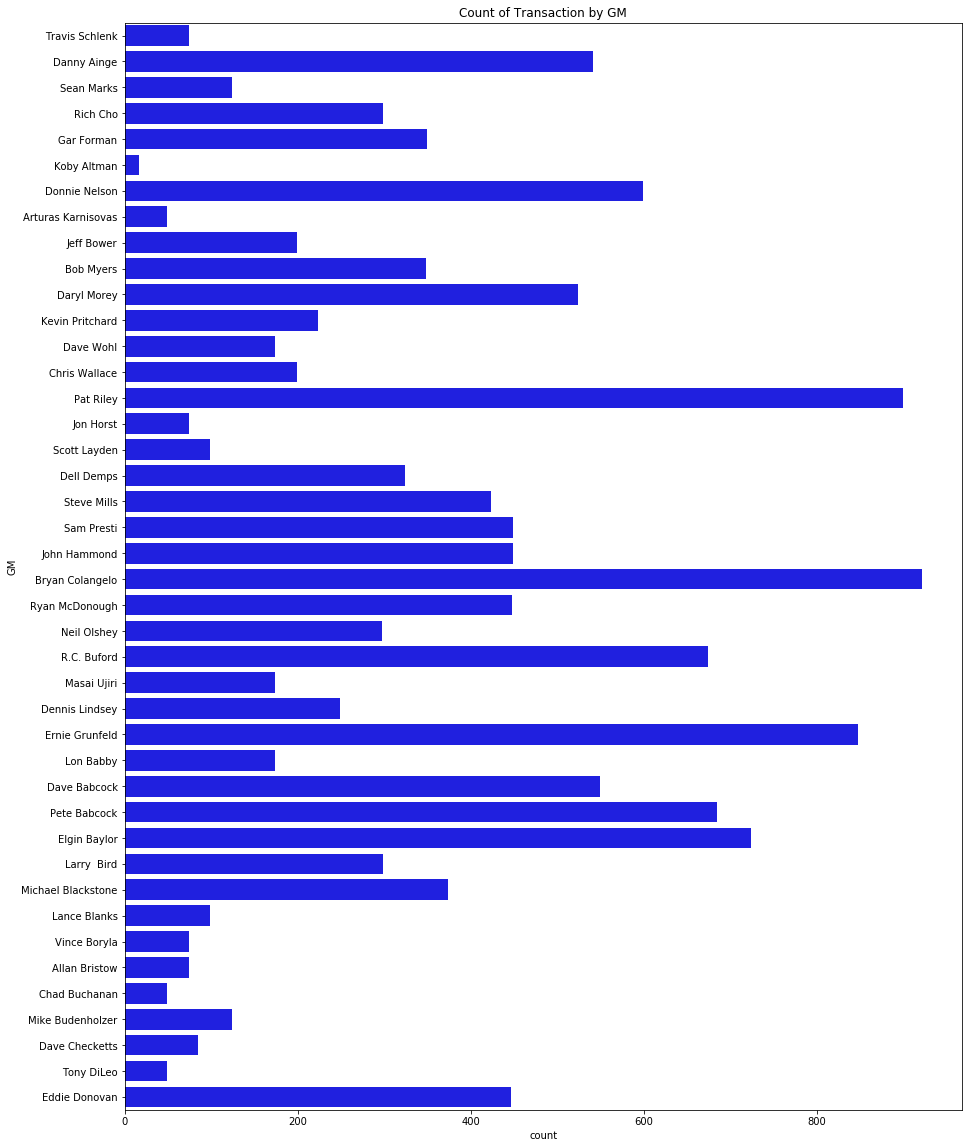

In [9]:
plt.figure(figsize=(15,20))
finalDat.groupby(finalDat['GM']).count()
gmCnt2 = sns.countplot(y='GM', data=finalDat,color='blue')
gmCnt2.set_title("Count of Transaction by GM")